In [132]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import norm, boxcox
from collections import Counter
from scipy import stats

# warning library
import warnings
warnings.filterwarnings("ignore")

In [133]:
data = pd.read_csv("/Users/MinhTan/Desktop/winequality-red (2).csv")

# DATA EXPLORATION ANALYSIS

In [134]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [135]:
# the columns 
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [136]:
print("Data Shape --> ",data.shape)

Data Shape -->  (1599, 12)


In [137]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [138]:
print("Data Info")
data.info()

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In this section, we will look at how properties have an effect on the target variable.

In [139]:
data[["fixed acidity","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,fixed acidity
0,3,8.360000
1,4,7.779245
2,5,8.167254
3,6,8.347179
4,7,8.872362
5,8,8.566667


The increase in fixed acidity positively affects the given vote. But it is difficult to make a full conclusion at this stage.

In [140]:
data[["volatile acidity","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,volatile acidity
0,3,0.884500
1,4,0.693962
2,5,0.577041
3,6,0.497484
4,7,0.403920
5,8,0.423333


I can make a more precise sentence according to the comment I made above. The decrease in volatile acidity affects the votes positively.

In [141]:
data[["citric acid","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,citric acid
0,3,0.171000
1,4,0.174151
2,5,0.243686
3,6,0.273824
4,7,0.375176
5,8,0.391111


In [142]:
data[["residual sugar","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,residual sugar
0,3,2.635000
1,4,2.694340
2,5,2.528855
3,6,2.477194
4,7,2.720603
5,8,2.577778


In [143]:
data[["chlorides","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,chlorides
0,3,0.122500
1,4,0.090679
2,5,0.092736
3,6,0.084956
4,7,0.076588
5,8,0.068444


The decrease in chlorides positively affects the votes cast.

In [144]:
data[["free sulfur dioxide","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,free sulfur dioxide
0,3,11.000000
1,4,12.264151
2,5,16.983847
3,6,15.711599
4,7,14.045226
5,8,13.277778


It doesn't seem easy to comment on free sulfur dioxide either. The 13, 14 levels seem to have been voted well.

In [145]:
data[["total sulfur dioxide","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,total sulfur dioxide
0,3,24.900000
1,4,36.245283
2,5,56.513950
3,6,40.869906
4,7,35.020101
5,8,33.444444


In [146]:
data[["density","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,density
0,3,0.997464
1,4,0.996542
2,5,0.997104
3,6,0.996615
4,7,0.996104
5,8,0.995212


The intensity is almost the same in all votes, but there is only a slight decrease. Density drop seems to have a positive effect on the votes.

In [147]:
data[["pH","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,pH
0,3,3.398000
1,4,3.381509
2,5,3.304949
3,6,3.318072
4,7,3.290754
5,8,3.267222


We can say that the decrease in pH affects the votes positively.

In [148]:
data[["sulphates","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")


,quality,sulphates
0,3,0.570000
1,4,0.596415
2,5,0.620969
3,6,0.675329
4,7,0.741256
5,8,0.767778


It is clear from here that the increase in sulphates has a positive effect.

In [149]:
data[["alcohol","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds")

,quality,alcohol
0,3,9.955000
1,4,10.265094
2,5,9.899706
3,6,10.629519
4,7,11.465913
5,8,12.094444


# Missing Values


In [150]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [151]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# VISUALIZATION

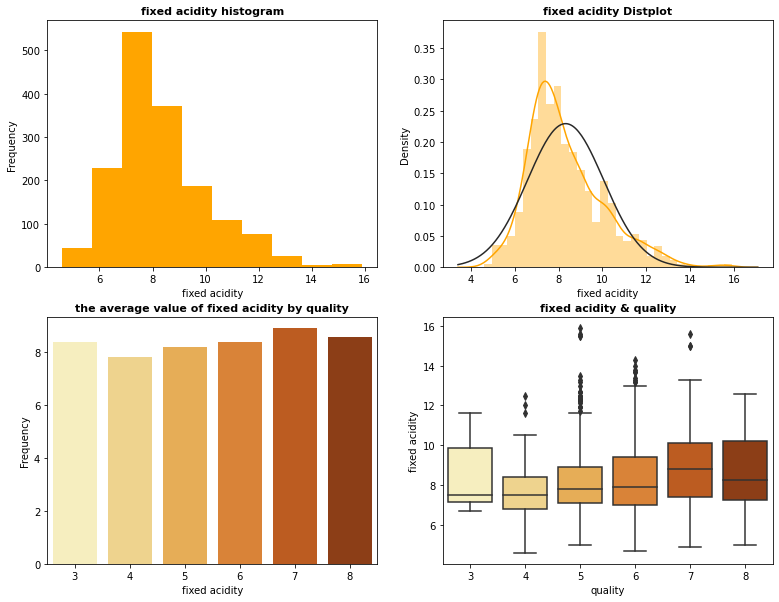

In [152]:
quality = [3,4,5,6,7,8]
fixedAcidityMean = []

for each in quality:
    x = data[data["quality"] == each]
    mean = x["fixed acidity"].mean()
    fixedAcidityMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(data["fixed acidity"], color="orange")
plt.xlabel("fixed acidity")
plt.ylabel("Frequency")
plt.title("fixed acidity histogram", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(data["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = fixedAcidityMean, palette="YlOrBr")
plt.title("the average value of fixed acidity by quality", color = "black", fontweight='bold', fontsize = 11)
plt.xlabel("fixed acidity")
plt.ylabel("Frequency")
plt.subplot(2,2,4)
sns.boxplot(data['quality'], data["fixed acidity"], palette='YlOrBr')
plt.title("fixed acidity & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

Fixed acidity may not have much effect on splitting votes.

On the 2nd graph, I see that there is a skewness to the right which need to be fixed

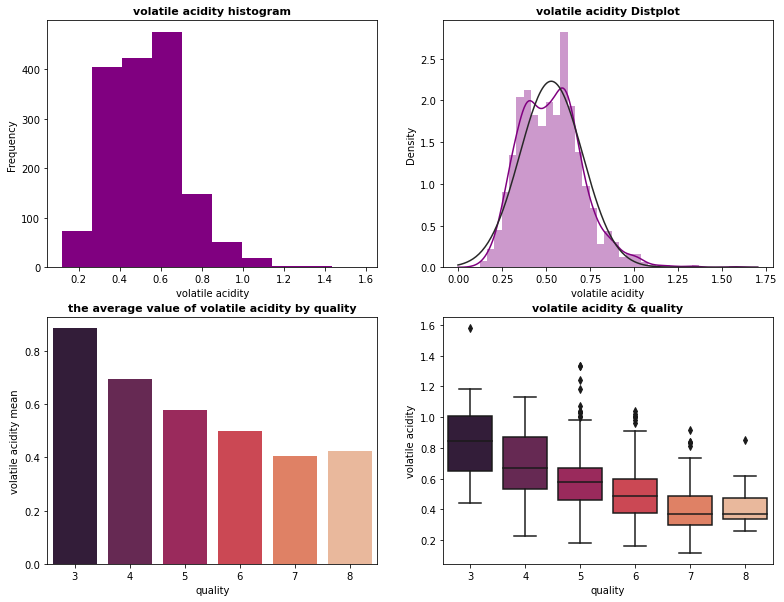

In [153]:
volatileAcidityMean = []

for each in quality:
    x = data[data["quality"] == each]
    mean = x["volatile acidity"].mean()
    volatileAcidityMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(data["volatile acidity"], color="purple")
plt.xlabel("volatile acidity")
plt.ylabel("Frequency")
plt.title("volatile acidity histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(data["volatile acidity"], fit=norm, color="purple")
plt.title("volatile acidity Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = volatileAcidityMean, palette= "rocket")
plt.title("the average value of volatile acidity by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("volatile acidity mean")
plt.subplot(2,2,4)
sns.boxplot(data['quality'], data["volatile acidity"], palette='rocket')
plt.title("volatile acidity & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

The decrease in volatile acidity seems to affect the votes positively.

When I examine the second graph, I see that the distribution is good.

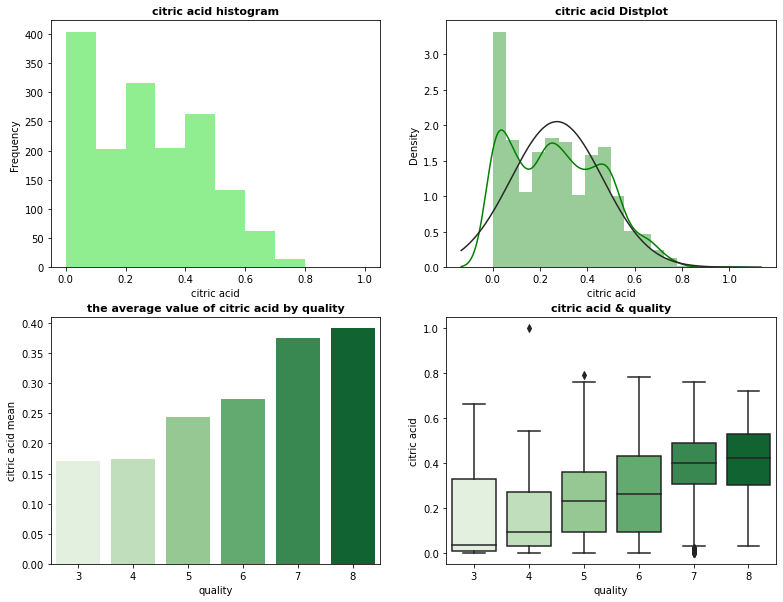

In [154]:
citricAcidMean = []

for each in quality:
    x = data[data["quality"] == each]
    mean = x["citric acid"].mean()
    citricAcidMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(data["citric acid"], color="lightgreen")
plt.xlabel("citric acid")
plt.ylabel("Frequency")
plt.title("citric acid histogram", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(data["citric acid"], fit=norm, color="green")
plt.title("citric acid Distplot", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = citricAcidMean, palette= "Greens")
plt.title("the average value of citric acid by quality", color = "black", fontweight= 'bold', fontsize = 11)
plt.xlabel("quality")
plt.ylabel("citric acid mean")
plt.subplot(2,2,4)
sns.boxplot(data['quality'], data["citric acid"], palette='Greens')
plt.title("citric acid & quality", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

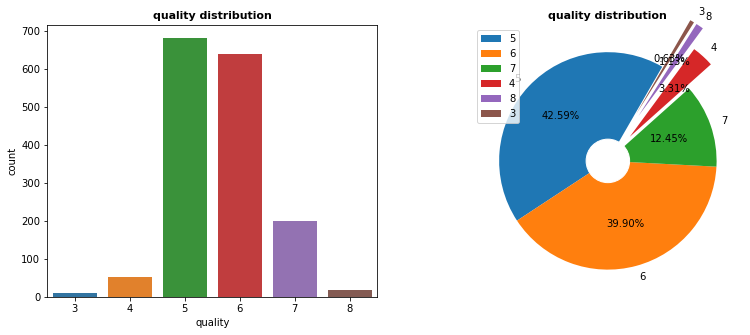

In [155]:
Number = data.quality.value_counts().values
Label = data.quality.value_counts().index
circle = plt.Circle((0,0),0.2,color = "white")
explodeTuple = (0.0, 0.0, 0.0, 0.3, 0.5, 0.5)

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.countplot(data["quality"])
plt.xlabel("quality")
plt.title("quality distribution", color = "black", fontweight= 'bold', fontsize = 11)
plt.subplot(1,2,2)
plt.pie(Number, labels = Label,autopct='%1.2f%%', explode=explodeTuple,startangle=60)
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("quality distribution", color = "black", fontweight= 'bold', fontsize = 11)
plt.legend()


plt.show()

# SKEWNESS CORRECTION

In this section, i will try to correct the skewness in some features of our data. I will do this by seeing them through graphs.

fixed acidity

residual sugar

free sulfur dioxide

total sulfur dioxide

sulphates

In [156]:
(mu, sigma) = norm.fit(data["fixed acidity"])
print("mu {} : {}, sigma {} : {}".format("fixed acidity", mu, "fixed acidity", sigma))

mu fixed acidity : 8.31963727329581, sigma fixed acidity : 1.7405518001102729


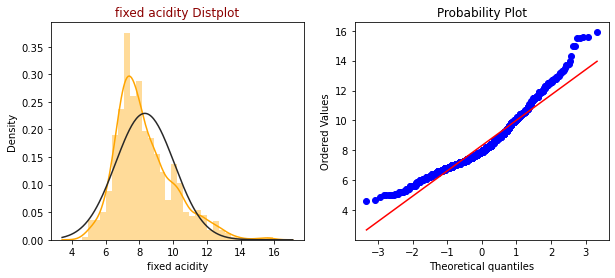

In [157]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["fixed acidity"], plot = plt)
plt.show()

In [158]:
data["fixed acidity"], lam_fixed_acidity = boxcox(data["fixed acidity"])

In [159]:
(mu, sigma) = norm.fit(data["fixed acidity"])
print("mu {} : {}, sigma {} : {}".format("fixed acidity", mu, "fixed acidity", sigma))

mu fixed acidity : 1.124655731469057, sigma fixed acidity : 0.048378082803535


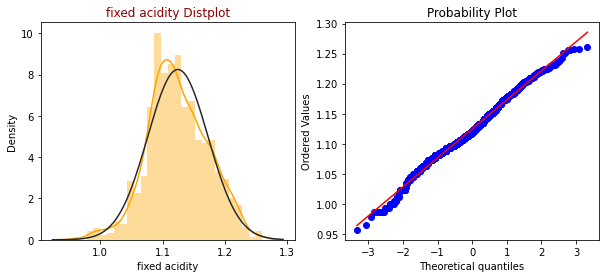

In [160]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["fixed acidity"], plot = plt)
plt.show()

In [161]:
(mu, sigma) = norm.fit(data["residual sugar"])
print("mu {} : {}, sigma {} : {}".format("residual sugar", mu, "residual sugar", sigma))

mu residual sugar : 2.53880550343965, sigma residual sugar : 1.4094871124880495


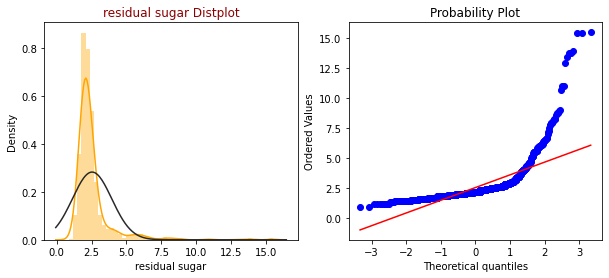

In [162]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["residual sugar"], plot = plt)
plt.show()


In [163]:
data["residual sugar"], lam_fixed_acidity = boxcox(data["residual sugar"])
(mu, sigma) = norm.fit(data["residual sugar"])
print("mu {} : {}, sigma {} : {}".format("residual sugar", mu, "residual sugar", sigma))

mu residual sugar : 0.5135558435839319, sigma residual sugar : 0.11004598444169933


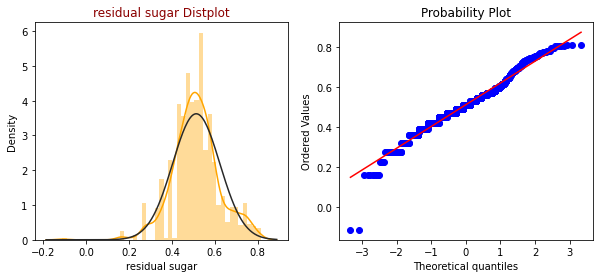

In [164]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["residual sugar"], plot = plt)
plt.show()

In [165]:
(mu, sigma) = norm.fit(data["free sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("free sulfur dioxide", mu, "free sulfur dioxide", sigma))

mu free sulfur dioxide : 15.874921826141339, sigma free sulfur dioxide : 10.45688561493072


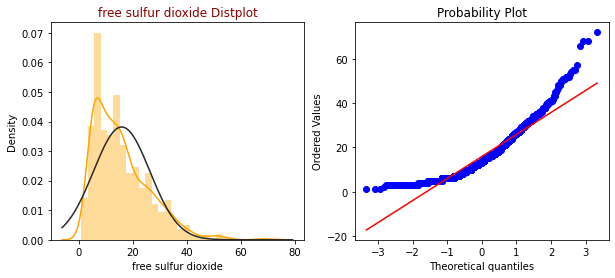

In [166]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["free sulfur dioxide"], fit=norm, color="orange")
plt.title("free sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["free sulfur dioxide"], plot = plt)
plt.show()

In [167]:
data["free sulfur dioxide"], lam_fixed_acidity = boxcox(data["free sulfur dioxide"])
(mu, sigma) = norm.fit(data["free sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("free sulfur dioxide", mu, "free sulfur dioxide", sigma))

mu free sulfur dioxide : 3.1290485296425143, sigma free sulfur dioxide : 0.9855086968773705


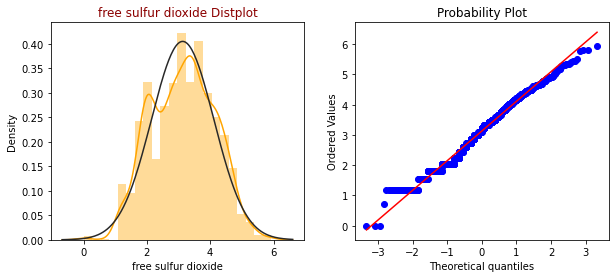

In [168]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["free sulfur dioxide"], fit=norm, color="orange")
plt.title("free sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["free sulfur dioxide"], plot = plt)
plt.show()

mu total sulfur dioxide : 46.46779237023139, sigma total sulfur dioxide : 32.88503665178374


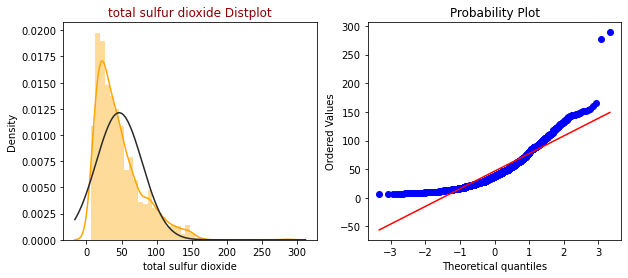

In [169]:
(mu, sigma) = norm.fit(data["total sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("total sulfur dioxide", mu, "total sulfur dioxide", sigma))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["total sulfur dioxide"], fit=norm, color="orange")
plt.title("total sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["total sulfur dioxide"], plot = plt)
plt.show()

In [170]:
data["total sulfur dioxide"], lam_fixed_acidity = boxcox(data["total sulfur dioxide"])
(mu, sigma) = norm.fit(data["total sulfur dioxide"])
print("mu {} : {}, sigma {} : {}".format("total sulfur dioxide", mu, "total sulfur dioxide", sigma))

mu total sulfur dioxide : 3.9657192644535324, sigma total sulfur dioxide : 0.8459104716754929


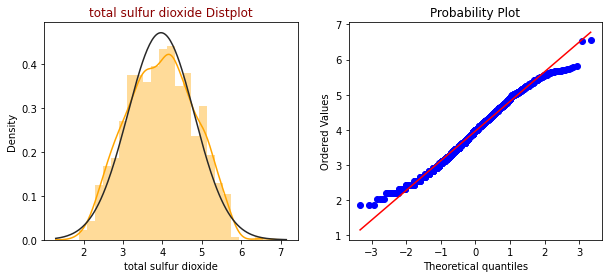

In [171]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["total sulfur dioxide"], fit=norm, color="orange")
plt.title("total sulfur dioxide Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["total sulfur dioxide"], plot = plt)
plt.show()

In [172]:
(mu, sigma) = norm.fit(data["alcohol"])
print("mu {} : {}, sigma {} : {}".format("alcohol", mu, "alcohol", sigma))

mu alcohol : 10.422983114446529, sigma alcohol : 1.0653343003437483


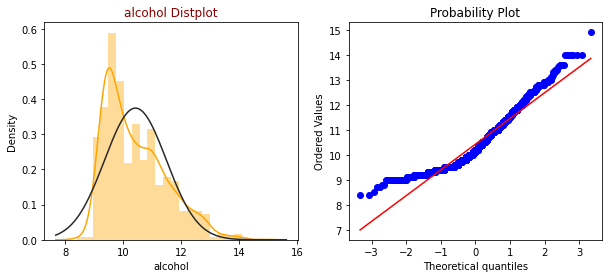

In [173]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["alcohol"], fit=norm, color="orange")
plt.title("alcohol Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["alcohol"], plot = plt)
plt.show()

In [174]:
data["alcohol"], lam_fixed_acidity = boxcox(data["alcohol"])
(mu, sigma) = norm.fit(data["alcohol"])
print("mu {} : {}, sigma {} : {}".format("alcohol", mu, "alcohol", sigma))

mu alcohol : 0.3005237243397624, sigma alcohol : 3.922651387741175e-05


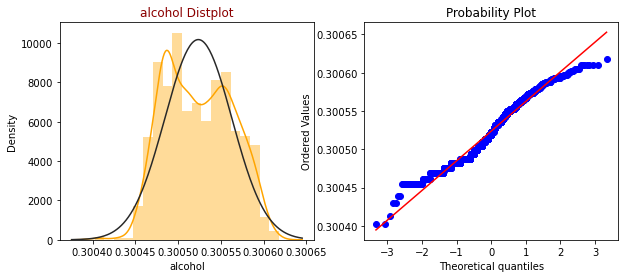

In [175]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(data["alcohol"], fit=norm, color="orange")
plt.title("alcohol Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(data["alcohol"], plot = plt)
plt.show()


# OUTLIERS DETECTION

I detect outliers in our data. and I will extract them from the data.

In [176]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5) 
    
    return multiple_outliers

In [177]:
print("number of outliers detected is ",len(data.loc[detect_outliers(data,data.columns[:-1])]))
data.loc[detect_outliers(data,data.columns[:-1])]

number of outliers detected is  68


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,0.956497,0.520,0.15,0.494302,0.054,2.427186,4.649352,0.99340,3.90,0.56,0.300598,4
94,0.985731,1.020,0.04,0.277689,0.045,4.920668,4.983161,0.99380,3.75,0.48,0.300535,4
95,0.964194,0.600,0.17,0.530233,0.058,3.504207,5.261323,0.99320,3.85,0.60,0.300595,6
442,1.257350,0.685,0.76,0.666360,0.100,2.046206,4.144017,1.00320,2.95,0.68,0.300559,7
553,0.985731,1.040,0.24,0.360736,0.050,4.503448,5.136097,0.99340,3.74,0.62,0.300567,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1319,1.153967,0.760,0.68,0.394331,0.414,3.590783,4.630198,0.99652,2.90,1.33,0.300462,6
1370,1.143543,0.780,0.51,0.394331,0.415,2.991877,4.668228,0.99623,3.00,1.17,0.300469,5
1371,1.106811,0.580,0.56,0.624358,0.153,1.812859,2.823886,0.99476,3.21,1.03,0.300569,6
1372,1.143543,0.780,0.51,0.394331,0.415,2.991877,4.668228,0.99623,3.00,1.17,0.300469,5


In [178]:
#Remove outliers
data = data.drop(detect_outliers(data,data.columns[:-1]),axis = 0).reset_index(drop = True)

# BUILD MODEL

In [179]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import collections
from imblearn.over_sampling import SMOTE

In [180]:
bins = (2, 6.5, 8)
labels = [0, 1]
data['quality'] = pd.cut(x = data['quality'], bins = bins, labels = labels)

In [181]:
#I make the variable quality into 2 variables, 0 and 1.
data['quality'].value_counts()

0    1323
1     208
Name: quality, dtype: int64

I see that there is a big difference between the 2 values. So I see that it is unbalanced. I will fix this.

TRAIN-TEST SPLIT

In [182]:
y = data.quality
x = data.drop(["quality"], axis = 1)

In [183]:
test_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 206)

In [184]:
# I saw above that our data is an unbalanced data. I fix this with the help of smote.
sm = SMOTE(random_state=14)
X_train_sm, y_train_sm = sm.fit_resample(X_train, Y_train)
print("Before smote: ", collections.Counter(Y_train))
print("After smote: ", collections.Counter(y_train_sm))

Before smote:  Counter({0: 1052, 1: 172})
After smote:  Counter({0: 1052, 1: 1052})


STANDARD SCALER

In [185]:
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm) 
X_test = scaler.transform(X_test) 

In [186]:
results = []

# RandomForestClassifier

Score :  0.9576547231270358
RandomForestClassifier Acc :  0.9576547231270358


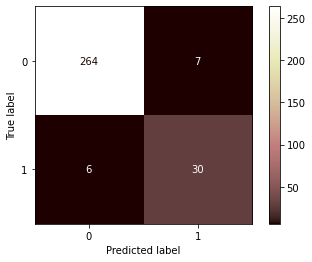

In [187]:
rf = RandomForestClassifier(max_depth=18, random_state=44, bootstrap = False)
rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_rf)

acc = accuracy_score(Y_test, y_pred_rf)
score = rf.score(X_test, Y_test)
results.append(acc)

print("Score : ", score)
print("RandomForestClassifier Acc : ", acc)

plot_confusion_matrix(rf, X_test, Y_test, cmap= "pink")  
plt.show()

In [188]:
print(" \t \t  RandomForestClassifier Classification Report")
print(classification_report(Y_test, y_pred_rf))

 	 	  RandomForestClassifier Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       271
           1       0.81      0.83      0.82        36

    accuracy                           0.96       307
   macro avg       0.89      0.90      0.90       307
weighted avg       0.96      0.96      0.96       307



In [189]:
test_data = pd.DataFrame()
test_data["citric acid"] = data["volatile acidity"][:307]
test_data["fixed acidity"] = data["fixed acidity"][:307]
test_data["y_pred_rf"] = y_pred_rf
test_data["Y_test"] = Y_test.values

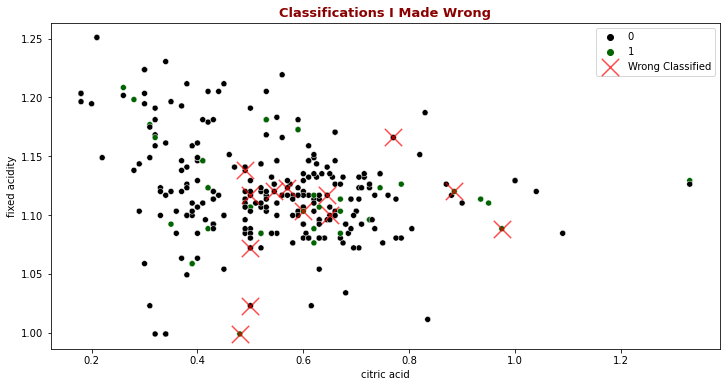

In [196]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="citric acid", y="fixed acidity", hue="Y_test", data=test_data, palette=["Black","darkgreen"])
plt.title("Classifications I Made Wrong", fontsize = 13, fontweight = "bold", color = "darkred")

diff = np.where(y_pred_rf!=Y_test)[0]
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified", marker="x",alpha = 0.7, color = "Red",s = 300)
plt.legend()
plt.show()

# LOGISTIC REGRESSION

In [192]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train_sm, y_train_sm)

LogisticRegression(multi_class='multinomial')

In [193]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_acc = accuracy_score(Y_test, lr.predict(X_test))
print(f"Accuracy Score of Training Data is {accuracy_score(y_train_sm, lr.predict(X_train_sm))}")
print(f"Accuracy Score of Training Data is {lr_acc}\n")

Accuracy Score of Training Data is 0.811787072243346
Accuracy Score of Training Data is 0.7947882736156352



In [197]:
y_pred_lr = lr.predict(X_test)

cm_lr = confusion_matrix(Y_test, y_pred_lr)

In [199]:
print(" \t \t  LogisticRegression Report")
print(classification_report(Y_test, y_pred_lr))

 	 	  LogisticRegression Report
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       271
           1       0.34      0.83      0.49        36

    accuracy                           0.79       307
   macro avg       0.66      0.81      0.68       307
weighted avg       0.90      0.79      0.83       307



# MODEL RESULT

I achieved the highest success in Random Forest with 0.96 (96% accuracy).